# Introduction to ML: Predictions -- COVID-19 Vaccination Progress

We will use the COVID-19 Vaccination dataset from Kaggle ([link](https://www.kaggle.com/gpreda/covid-world-vaccination-progress)).

This tutorial is modified from https://www.kaggle.com/mrinalchandramishra/predicting-vaccination-done-in-future
1. Dataset Overview and basic visualisation
2. Linear regression model
3. K-means clustering 

In [1]:
# # install python packages using pip
# !pip install pandas --quiet
# !pip install seaborn --quiet
# !pip install missingno --quiet
# # monitor cpu/ram usage 
# !pip install jupyterlab-system-monitor
# !pip install scikit-learn

In [2]:
# import python packages we just installed
# %matplotlib widget
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# you might need to specify your own data path
path = "data/"

# 1. Dataset Overview and basic visualisation

Firstly, let's have an overview of the dataset 
* 1. load data into a pandas DataFrame using pd.read_csv()
* 2. randomly sample 5 data points from your DataFrame 

In [4]:
df=pd.read_csv(path + 'country_vaccinations.csv')
df.sample(5)    

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
55808,New Zealand,NZL,2021-11-06,7049506.0,3749137.0,3297053.0,34206.0,27826.0,137.52,73.14,64.32,5428.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Ministry of Health,https://www.health.govt.nz/our-work/diseases-a...
64640,Rwanda,RWA,2021-04-16,349702.0,349702.0,NaN,275.0,60.0,2.63,2.63,NaN,5.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",World Health Organization,https://africacdc.org/covid-19-vaccination/
24020,England,OWID_ENG,2021-11-17,92778190.0,42531770.0,38641051.0,360981.0,335005.0,164.06,75.21,68.33,5924.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/vaccin...
50119,Mexico,MEX,2021-08-13,74802779.0,52624341.0,28384141.0,1031029.0,570628.0,57.42,40.40,21.79,4381.0,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr...",Secretary of Health,http://www.gob.mx/cms/uploads/attachment/file/...
44189,Lesotho,LSO,2021-09-07,NaN,NaN,NaN,NaN,5703.0,NaN,NaN,NaN,2641.0,"Johnson&Johnson, Oxford/AstraZeneca, Sinopharm...",World Health Organization,https://covid19.who.int/


We can find NaN in the data, which means some records are missing.

Let first look how many data we have in this dataset by printing the shape of the dataframe

In [5]:
# show the shape of the dataframe
print(f'shape of data is: {df.shape}')

shape of data is: (86512, 15)


Let's use a function called df.info() to have a concise summary of the data.

In [6]:
# print a concise summary of a DataFrame 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86512 entries, 0 to 86511
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              86512 non-null  object 
 1   iso_code                             86512 non-null  object 
 2   date                                 86512 non-null  object 
 3   total_vaccinations                   43607 non-null  float64
 4   people_vaccinated                    41294 non-null  float64
 5   people_fully_vaccinated              38802 non-null  float64
 6   daily_vaccinations_raw               35362 non-null  float64
 7   daily_vaccinations                   86213 non-null  float64
 8   total_vaccinations_per_hundred       43607 non-null  float64
 9   people_vaccinated_per_hundred        41294 non-null  float64
 10  people_fully_vaccinated_per_hundred  38802 non-null  float64
 11  daily_vaccinations_per_milli

By combining multiple operation together, we can simplify our code.

Let's combine df.isnull() function and df.sum() function to count the total missing records inside the data

In [7]:
# counting missing values
print('\n Missing Values Summary: \n')
df.isnull().sum()


 Missing Values Summary: 



country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     42905
people_vaccinated                      45218
people_fully_vaccinated                47710
daily_vaccinations_raw                 51150
daily_vaccinations                       299
total_vaccinations_per_hundred         42905
people_vaccinated_per_hundred          45218
people_fully_vaccinated_per_hundred    47710
daily_vaccinations_per_million           299
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

/var/folders/0f/74t0_jrd7cg6w0svtvz1s8cm0000gp/T/ipykernel_86298/4257084253.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap="Blues")


Text(0.5, 1.0, 'Correlation Between different Features')

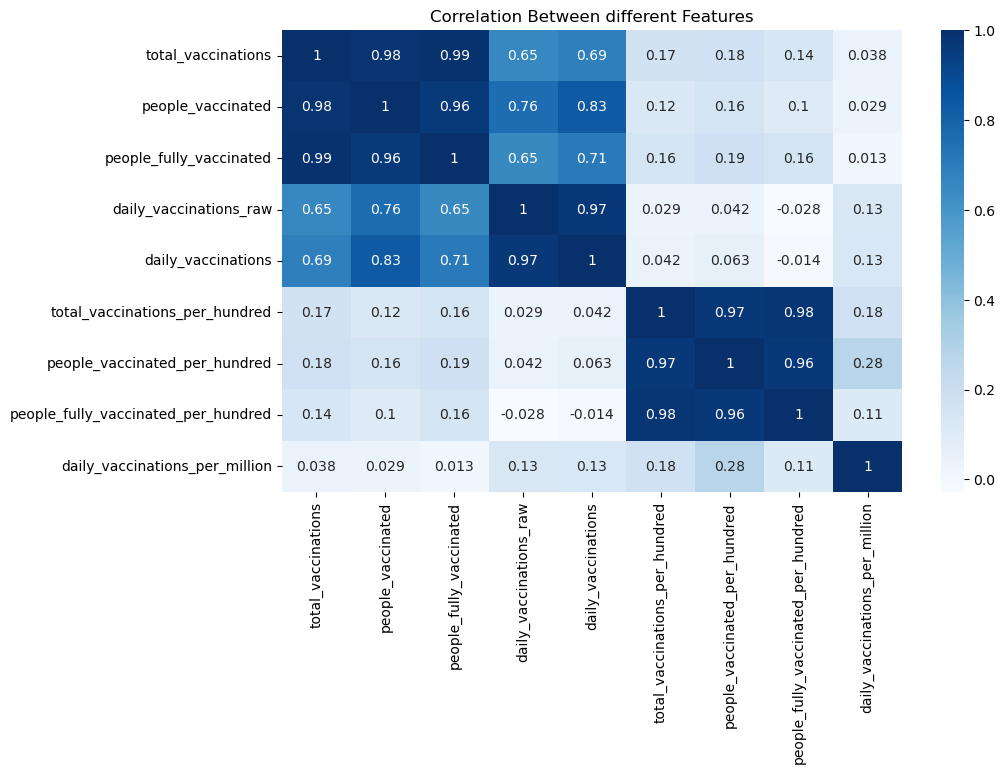

In [8]:
# first of all lets check about correlation in our data
fig,ax=plt.subplots(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap="Blues")
plt.title('Correlation Between different Features')

we can further plot the data to verify the linear correlation between features

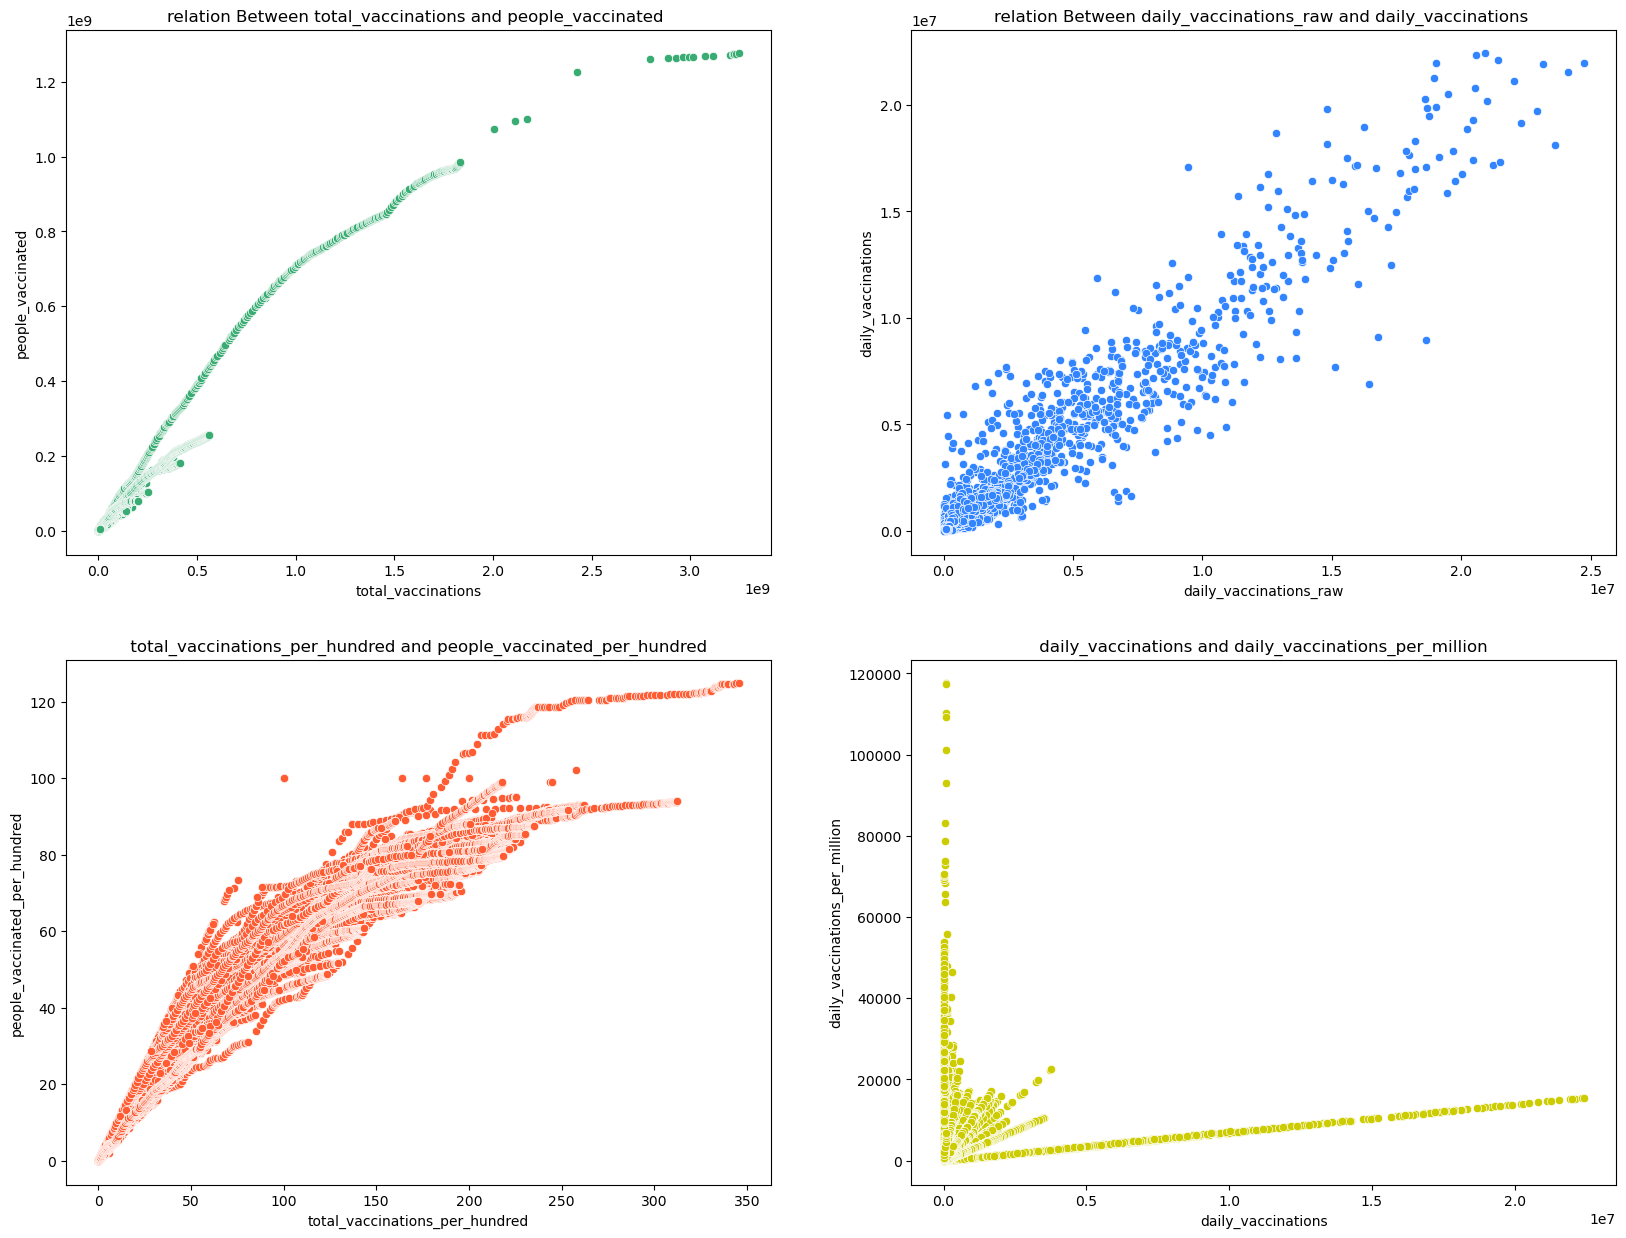

In [9]:
fig, ax = plt.subplots(2,2,figsize=(20,15))
#fig 1
sns.scatterplot(x=df['total_vaccinations'], y=df['people_vaccinated'],ax=ax[0][0],color='#39ac73')
ax[0,0].set_title('relation Between total_vaccinations and people_vaccinated ')
#fig 2
sns.scatterplot(x=df['daily_vaccinations_raw'], y=df['daily_vaccinations'], color='#3385ff',ax=ax[0][1])
ax[0][1].set_title('relation Between daily_vaccinations_raw and daily_vaccinations ')
#fig 3
sns.scatterplot(x=df['total_vaccinations_per_hundred'], y=df['people_vaccinated_per_hundred'], color='#ff5c33',ax=ax[1][0])
ax[1][0].set_title(' total_vaccinations_per_hundred and people_vaccinated_per_hundred ')
#fig 4
sns.scatterplot(x=df['daily_vaccinations'],y=df['daily_vaccinations_per_million'], color='#cccc00',ax=ax[1][1])
ax[1][1].set_title(' daily_vaccinations and daily_vaccinations_per_million ')
plt.show()

Let's do some visualisation 

List the top 10 countries by the total number of people get vaccinated in descending order

/var/folders/0f/74t0_jrd7cg6w0svtvz1s8cm0000gp/T/ipykernel_86298/711106727.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sum_df=df.groupby('country').sum().sort_values(by='daily_vaccinations',ascending=False)[:10]


<Axes: title={'center': 'Top 10 countries based on the vaccinated population'}, xlabel='country', ylabel='daily_vaccinations'>

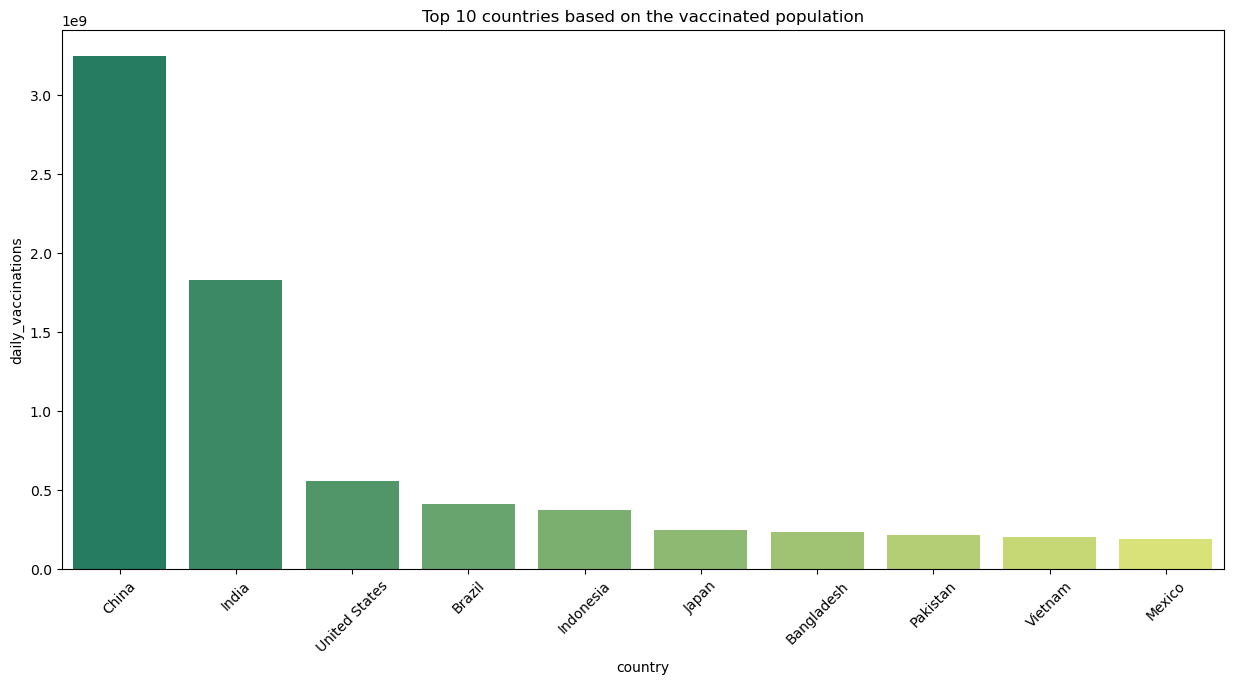

In [10]:
sum_df=df.groupby('country').sum().sort_values(by='daily_vaccinations',ascending=False)[:10]
fig,ax=plt.subplots(figsize=(15,7))
plt.title('Top 10 countries based on the vaccinated population')
plt.xticks(rotation=45)
sns.barplot(x=sum_df.index,y=sum_df['daily_vaccinations'],palette='summer')

<div class="alert alert-block alert-warning">
<b>TODO: Show top 10 countries by total number of people vaccinated during February in descending order
    
* check pd.to_datatime() function
* create a date mask to select data between 2022/02/01 and 2022/03/01 and use pandas.DataFrame.loc() to select the data
* check pd.groupby() functions: pandas.DataFrame.groupby() and pandas.DataFrame.sort_values()
</b>
</div>

In [11]:
### Your solution TODO



In [18]:
# Solution

# df['date']=pd.to_datetime(df['date'])
# mask = (df['date'] >= '2022-2-1') & (df['date'] < '2022-3-1')
# masked_df = df.loc[mask]

# mean_df=masked_df.groupby('country').sum().sort_values(by='daily_vaccinations',ascending=False)[:10]
# fig,ax=plt.subplots(figsize=(15,10))
# plt.title('Total Number of people vaccinated during February')
# plt.xticks(rotation=60)
# sns.barplot(x=mean_df.index,y=mean_df['daily_vaccinations'],palette='icefire')

# 2. Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression
# creating model
linear_regression_model=LinearRegression(n_jobs=-1)

To build linear regression model using sklearn
* you just import the function from sklearn.linear_model
* then initialise your linear regression model  

by passing different number of 'n_jobs' to our sklearn model, we are basically telling how many cpu cores our model should use. A value of -1 for n_jobs means that all available CPU cores will be used.

Overall, this code appears to be preparing the data for linear regression by grouping the vaccination data by date, calculating the total vaccinations for each date, and adding a new column date_diff to store the integer values corresponding to each date. Finally, it fits a linear regression model to the date_diff and total_vaccinations variables to predict the number of vaccinations per day. 

The %time command is used to measure the execution time of this process. The user and sys times refer to the amount of CPU time used by the code in user and system mode, respectively. The total time is the sum of the user and sys times.
The Wall time is the elapsed time between the start and end of the code block. This includes the time taken by the code to execute as well as any time spent waiting for input/output operations or for other processes to complete. 
Overall, the CPU times and Wall time outputs can be used to measure the performance of your code and identify any bottlenecks that may be slowing down your program. However, it's important to keep in mind that the execution time of your code may vary depending on the hardware you are running it on and other factors such as the size of your dataset or the complexity of your algorithm.

In [13]:
%time
# now we have added one more columns that is difference of date
# now we will see that how many vaccines are vaccinated each day
df['date']=pd.to_datetime(df['date'])
dt=df.groupby('date').sum() # the number of row is decided by the number of date in the data
dt['date_diff']=np.arange(len(dt['total_vaccinations']))

# lets create our x and Y variable
x=dt[['date_diff']]
y=dt['total_vaccinations']

CPU times: user 3 µs, sys: 2 µs, total: 5 µs
Wall time: 9.06 µs


/var/folders/0f/74t0_jrd7cg6w0svtvz1s8cm0000gp/T/ipykernel_86298/502600398.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dt=df.groupby('date').sum() # the number of row is decided by the number of date in the data


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(dt[['date_diff']], dt['total_vaccinations'], test_size=0.2, random_state=42)

# Create an instance of the LinearRegression class
linear_regression_model = LinearRegression()


Mean squared error: 2.869028951907308e+17


<div class="alert alert-block alert-warning">
<b>TODO: Fit the linear regression model on the training data. Make predictions (y_pred) on the test data 
</b>
</div>

In [ ]:
# Your solution: 
# TODO


In [ ]:
# solution
# linear_regression_model.fit(x_train, y_train)
# y_pred = linear_regression_model.predict(x_test)

In [ ]:
# Evaluate the performance of the model using mean squared error metric
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse)

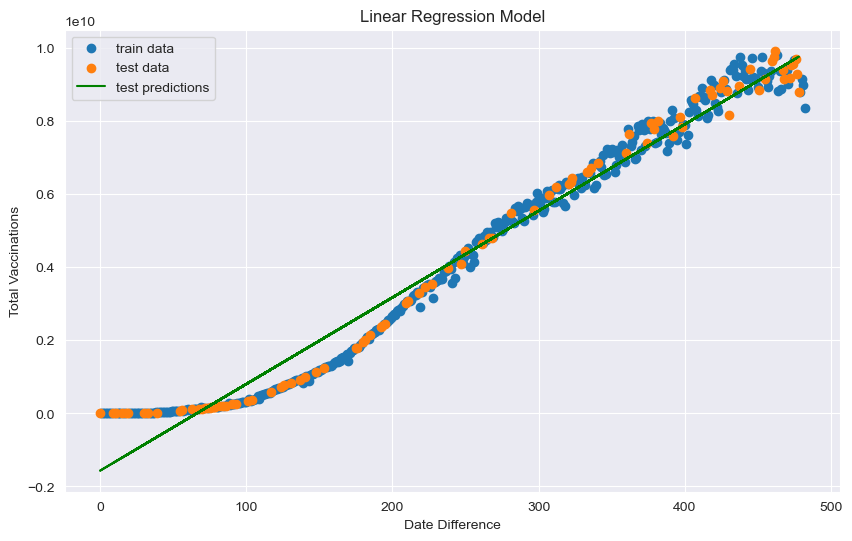

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the predictions on the train and test data
sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, label='train data')
plt.scatter(x_test, y_test, label='test data')
plt.plot(x_test, y_pred, color='green', label='test predictions')
plt.title('Linear Regression Model')
plt.xlabel('Date Difference')
plt.ylabel('Total Vaccinations')
plt.legend()
plt.show()


# 3. K-means

an example of using sklearn.cluster.KMeans to do clustering.
* try to change the 'n_clusters' with different number, and see how it change the results(i.e. n_clusters=20)

the KMeans class is instantiated with n_clusters=2, indicating that the algorithm should group the data into two clusters. The fit() method of the KMeans object is then called, passing in a subset of the data frame containing the columns to be used in the clustering analysis: total_vaccinations_per_hundred, people_vaccinated_per_hundred, and daily_vaccinations.



In [16]:
from sklearn.cluster import KMeans

dt=df.groupby('country', as_index=False).sum().sort_values(by=['total_vaccinations'], ascending=False)[10:30]
dt=dt[['country','total_vaccinations', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'daily_vaccinations']]


[[1.58731614e+04 8.47050857e+03 2.00561485e+08]
 [3.78556392e+04 1.88820746e+04 8.41090596e+07]]


/var/folders/0f/74t0_jrd7cg6w0svtvz1s8cm0000gp/T/ipykernel_86298/1964258034.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dt=df.groupby('country', as_index=False).sum().sort_values(by=['total_vaccinations'], ascending=False)[10:30]
/Users/menang/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<div class="alert alert-block alert-warning">
<b>TODO: Fit KMeans with features 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'daily_vaccinations' for 2 clusters
</b>
</div>

In [ ]:
# TODO Your Solution

In [ ]:
# Solution
# kmeans = KMeans(n_clusters=2).fit(dt[['total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'daily_vaccinations']])


In [ ]:
centroids = kmeans.cluster_centers_
print(centroids)

Now we visualise our clusterings. The hue parameter is set to kmeans.labels_.astype(float), which assigns a unique color to each cluster based on the cluster assignments generated by the KMeans algorithm in the previous code block. The size parameter is set to "total_vaccinations", which sets the size of each point based on the total number of vaccinations for that country.

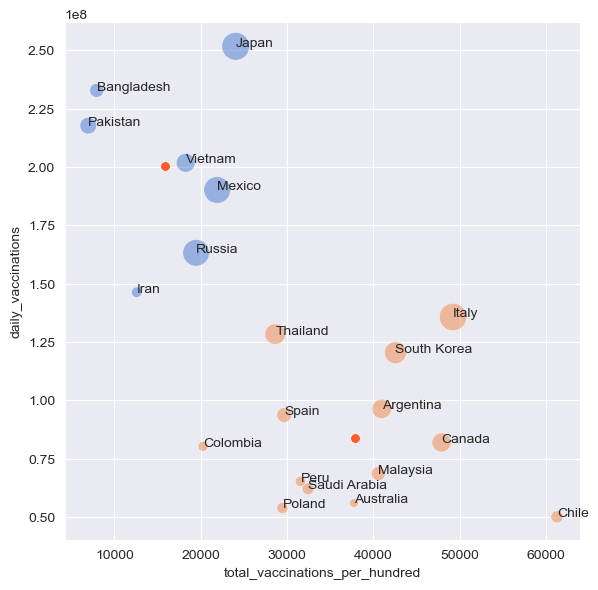

In [17]:
sns.relplot(x=dt['total_vaccinations_per_hundred'], y=dt['daily_vaccinations'], hue=kmeans.labels_.astype(float), size="total_vaccinations",
            sizes=(40, 400), alpha=.5, palette="muted", legend=False,
            height=6, data=dt)
sns.scatterplot(x=centroids[:, 0], y=centroids[:, 2], color='#ff5c33', s=50)
for i in range(len(dt)):
    country = dt.iloc[i].country
    plt.text(dt.total_vaccinations_per_hundred[dt.country==country],dt.daily_vaccinations[dt.country==country],country)
